In [87]:
import os
os.chdir('D://scratch_backup//perl//alpine_reprocess//mnc-pt-pyrid//calcs//surfs//4n//No_bias')
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import numpy as np
import jdftxfuncs as jfunc
import cohpfuncs as cfunc
import plotfuncs as pfunc
import matplotlib.pyplot as plt

In [15]:
bandfile='bandProjections'
gvecfile='Gvectors'
eigfile='eigenvals'
outfile='out'
S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)

pCOHP_uv(orb u index, orb v index, Emin, Emax, dE) -> pCOHP_uv(E) array, E array


In [98]:
def get_integrated_array(ygrid, dx):
    integrated_array = []
    cur = 0
    if dx is None:
        return None
    else:
        for y in ygrid:
            cur += y*dx
            integrated_array.append(cur)
    return np.array(integrated_array)

In [99]:
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)
orbsN1 = orbs_dict['N #1']
# Orbitals for carbons bonded to N #1
orbsCbN1 = orbs_dict['C #29'] + orbs_dict['C #33']
orbsPt = orbs_dict['Pt #1']

In [100]:
Emin = np.min(E)
Emax = np.max(E)
dE = 0.0001
Emax = cfunc.adjust_Emax(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)

In [101]:
COHP_Pt_N1 = np.zeros(np.shape(Egrid))
for u in orbsPt:
    for v in orbsN1:
        COHP_Pt_N1 += pCOHP_uv(u, v, Egrid, Emin, Emax, dE)

In [102]:
COHP_CbN1_N1 = np.zeros(np.shape(Egrid))
for u in orbsCbN1:
    for v in orbsN1:
        COHP_CbN1_N1 += pCOHP_uv(u, v, Egrid, Emin, Emax, dE)

In [103]:
COHP_Pt_N1_int = get_integrated_array(COHP_Pt_N1, dE)
COHP_CbN1_N1_int = get_integrated_array(COHP_CbN1_N1, dE)

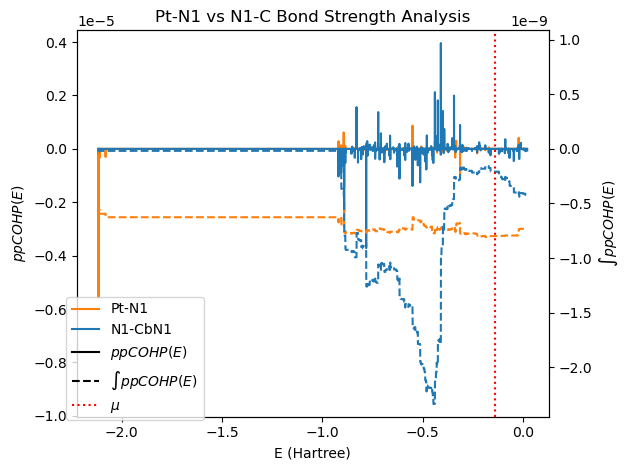

In [104]:
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_Pt_N1, color='C1', label='Pt-N1')
ax.plot(Egrid, COHP_CbN1_N1, color='C0', label='N1-CbN1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_Pt_N1_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_CbN1_N1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('Pt-N1 vs N1-C Bond Strength Analysis')


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig('integrated_ppCOHP_PtN1_N1CbN1.png')